In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [2]:
path = "/Users/pc/Desktop/polarization/"
train_dataset_path      = path + "Image Classification Dataset/" + "train"
validation_dataset_path = path + "Image Classification Dataset/" + "val"

In [3]:
IMG_WIDTH  = 40
IMG_HEIGHT = 40
BATCH_SIZE = 48

In [4]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 3888 images belonging to 3 classes.


In [5]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 192 images belonging to 3 classes.


In [6]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

num_of_classes = len(labels.keys())
print("number of classes: ", num_of_classes)

Label Mappings for classes present in the training and validation datasets

0 : chong
1 : metal
2 : plastic
number of classes:  3


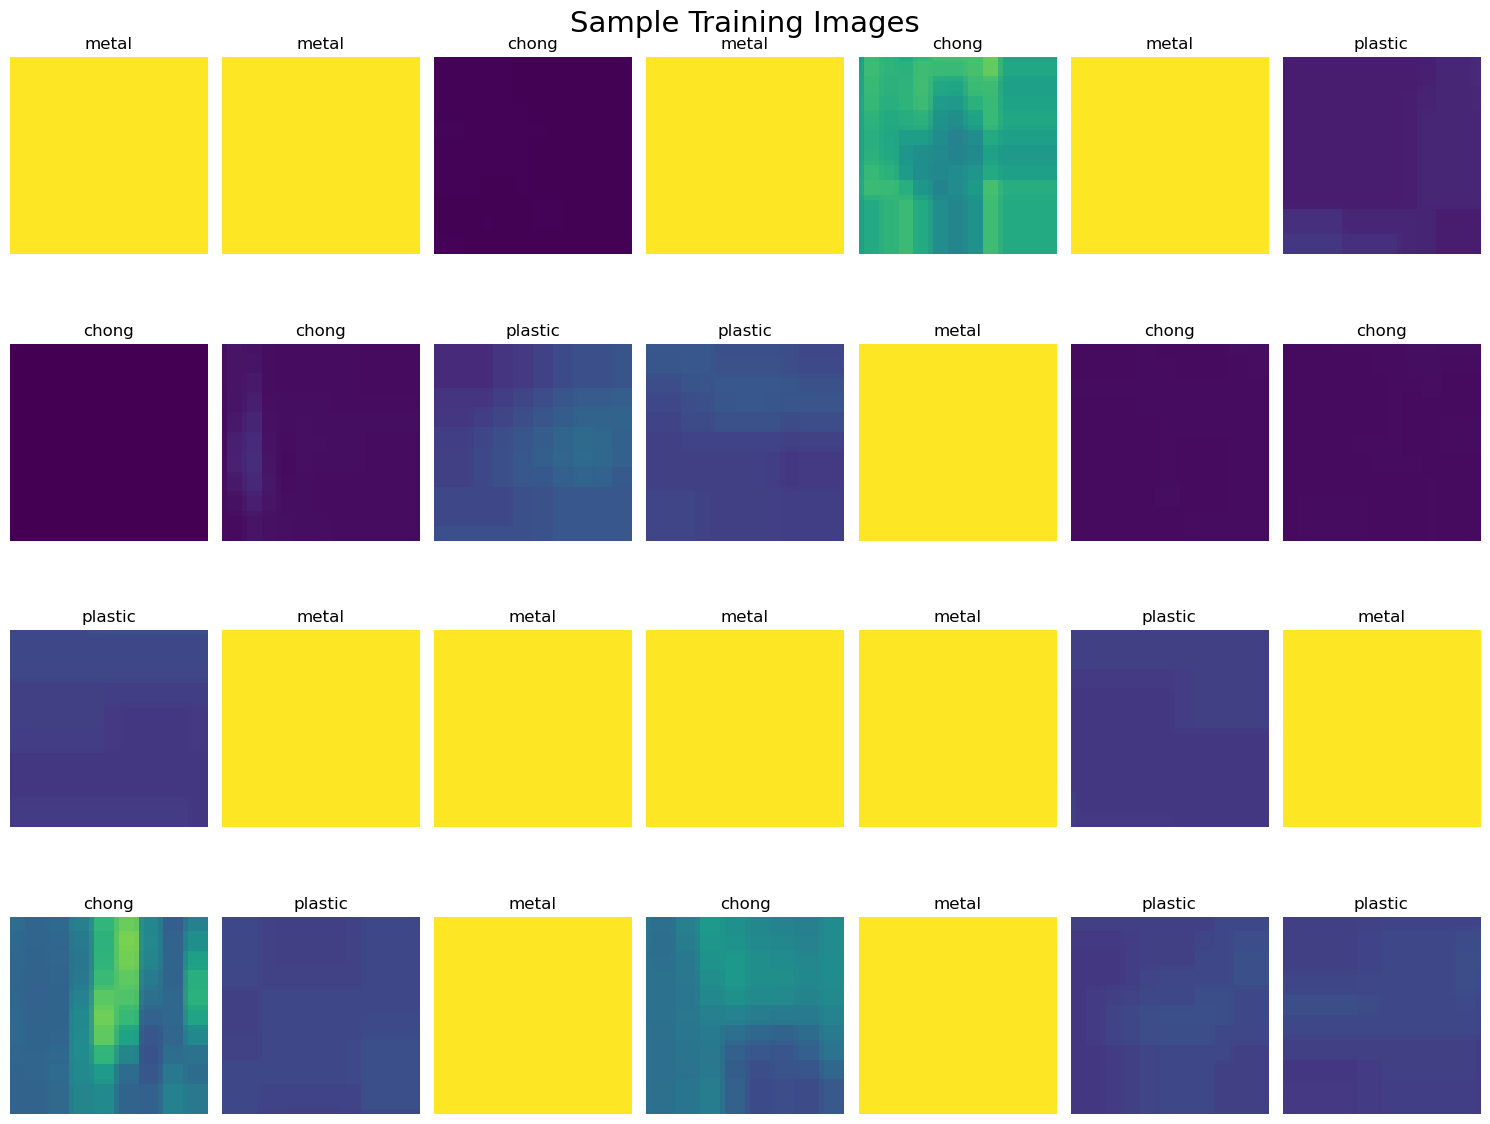

In [7]:
fig, ax = plt.subplots(nrows = 4, ncols = 7, figsize=(15, 12))
idx = 0

for i in range(4):
    for j in range(7):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [8]:
def create_model():
    model = Sequential([
        Conv2D(filters=128, kernel_size=(5, 5), padding='valid', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Flatten(),
        
        Dense(units=256, activation='relu'),
        Dropout(0.5),
        Dense(units = num_of_classes, activation='softmax')
    ])
    
    return model

In [9]:
cnn_model = create_model()

In [10]:
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 36, 36, 128)       9728      
                                                                 
 activation (Activation)     (None, 36, 36, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 18, 18, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 18, 18, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        73792     
                                                                 
 activation_1 (Activation)   (None, 16, 16, 64)        0

In [11]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

optimizer = Adam(learning_rate = 0.001)

cnn_model.compile(optimizer = optimizer, 
                  loss = CategoricalCrossentropy(), 
                  metrics = ['accuracy'])

history = cnn_model.fit(train_generator,
                        epochs = 30, 
                        validation_data=validation_generator, 
                        verbose = 2, 
                        callbacks = [reduce_lr])

Epoch 1/30
81/81 - 11s - loss: 0.1585 - accuracy: 0.9496 - val_loss: 1.0588 - val_accuracy: 0.6667 - lr: 0.0010 - 11s/epoch - 134ms/step
Epoch 2/30
81/81 - 9s - loss: 0.0682 - accuracy: 0.9802 - val_loss: 1.1810 - val_accuracy: 0.6927 - lr: 0.0010 - 9s/epoch - 114ms/step
Epoch 3/30
81/81 - 10s - loss: 0.0898 - accuracy: 0.9789 - val_loss: 1.4971 - val_accuracy: 0.6667 - lr: 0.0010 - 10s/epoch - 119ms/step
Epoch 4/30
81/81 - 10s - loss: 0.0604 - accuracy: 0.9838 - val_loss: 0.5846 - val_accuracy: 0.8177 - lr: 0.0010 - 10s/epoch - 118ms/step
Epoch 5/30
81/81 - 10s - loss: 0.0696 - accuracy: 0.9833 - val_loss: 0.4804 - val_accuracy: 0.8438 - lr: 0.0010 - 10s/epoch - 124ms/step
Epoch 6/30
81/81 - 10s - loss: 0.0725 - accuracy: 0.9817 - val_loss: 0.0838 - val_accuracy: 0.9792 - lr: 0.0010 - 10s/epoch - 125ms/step
Epoch 7/30
81/81 - 9s - loss: 0.0700 - accuracy: 0.9830 - val_loss: 0.0598 - val_accuracy: 0.9844 - lr: 0.0010 - 9s/epoch - 116ms/step
Epoch 8/30
81/81 - 10s - loss: 0.0609 - accur

In [12]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

learning_rate = history.history['lr']

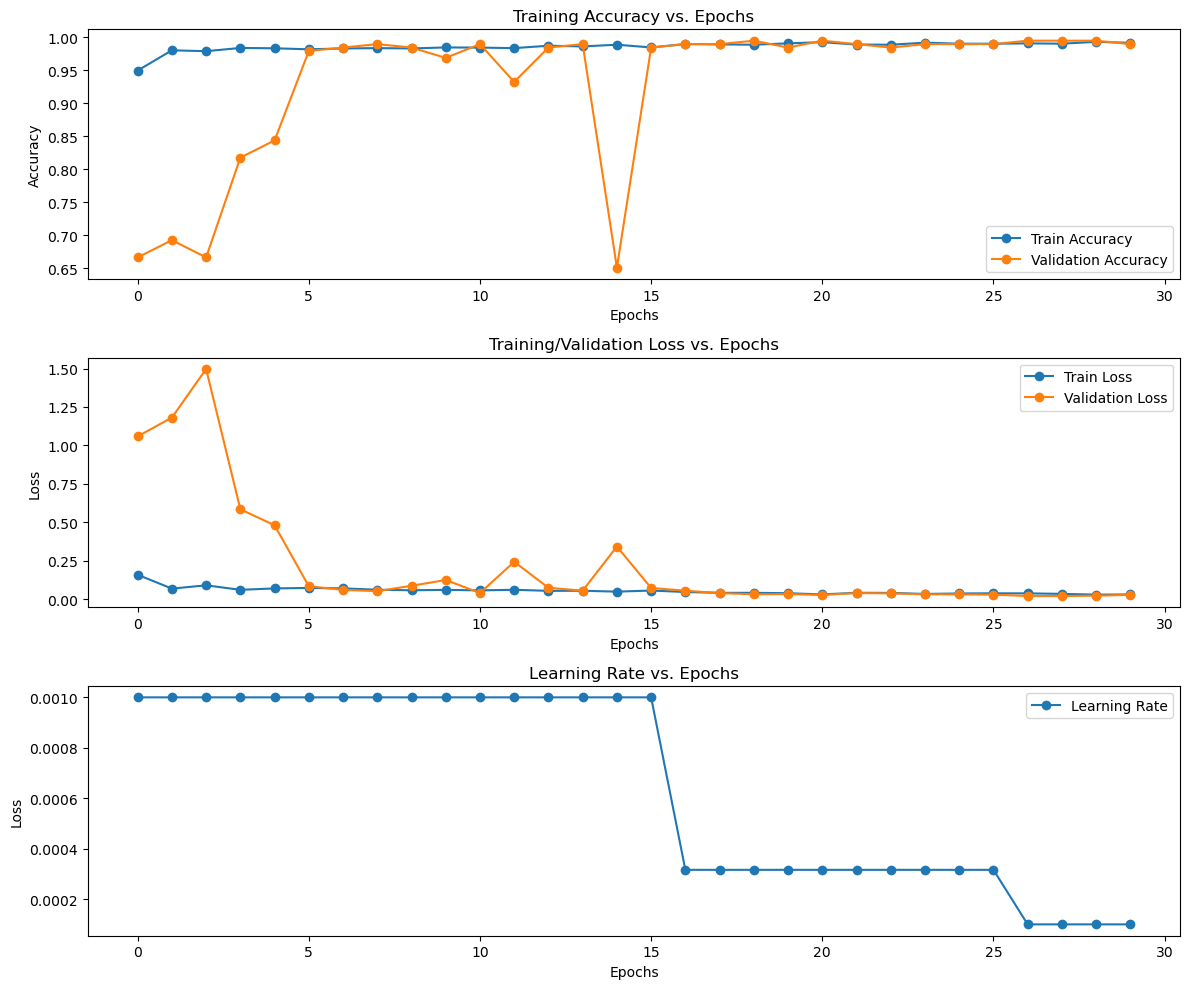

In [13]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [14]:
test_dataset = path + "Image Classification Dataset/" + "test"
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_dataset,
                                                 shuffle=False,
                                                 batch_size=BATCH_SIZE,
                                                 target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                 class_mode='categorical')


Found 972 images belonging to 3 classes.


In [15]:
predictions = cnn_model.predict(test_generator)

21/21 [==============================] - 1s 34ms/step


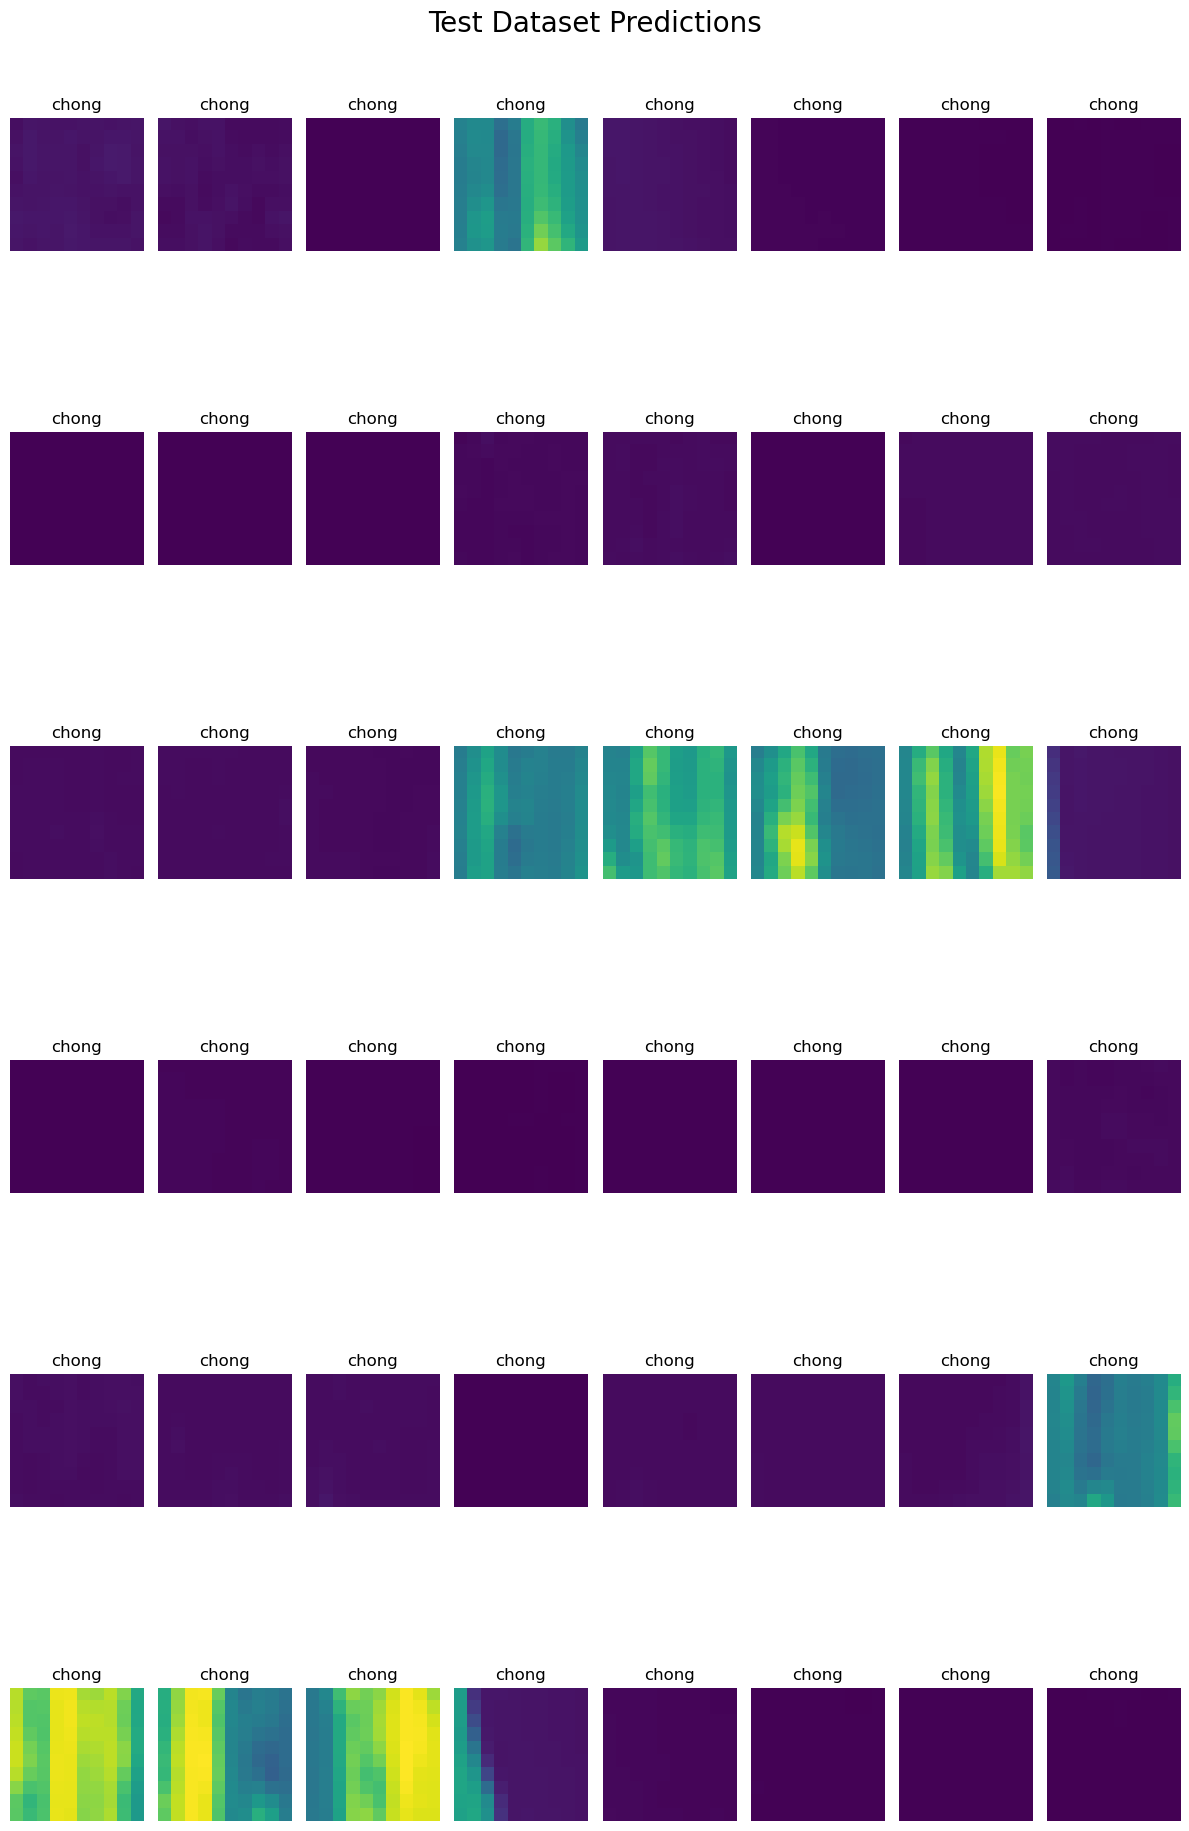

In [16]:
fig, ax = plt.subplots(nrows=6, ncols=8, figsize=(12, 20))
idx = 0

for i in range(6):
    for j in range(8):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [17]:
test_loss, test_accuracy = cnn_model.evaluate(test_generator, batch_size=BATCH_SIZE)

21/21 [==============================] - 1s 35ms/step - loss: 0.0295 - accuracy: 0.9907


In [18]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     0.029531560838222504
Test Accuracy: 0.9907407164573669


In [19]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

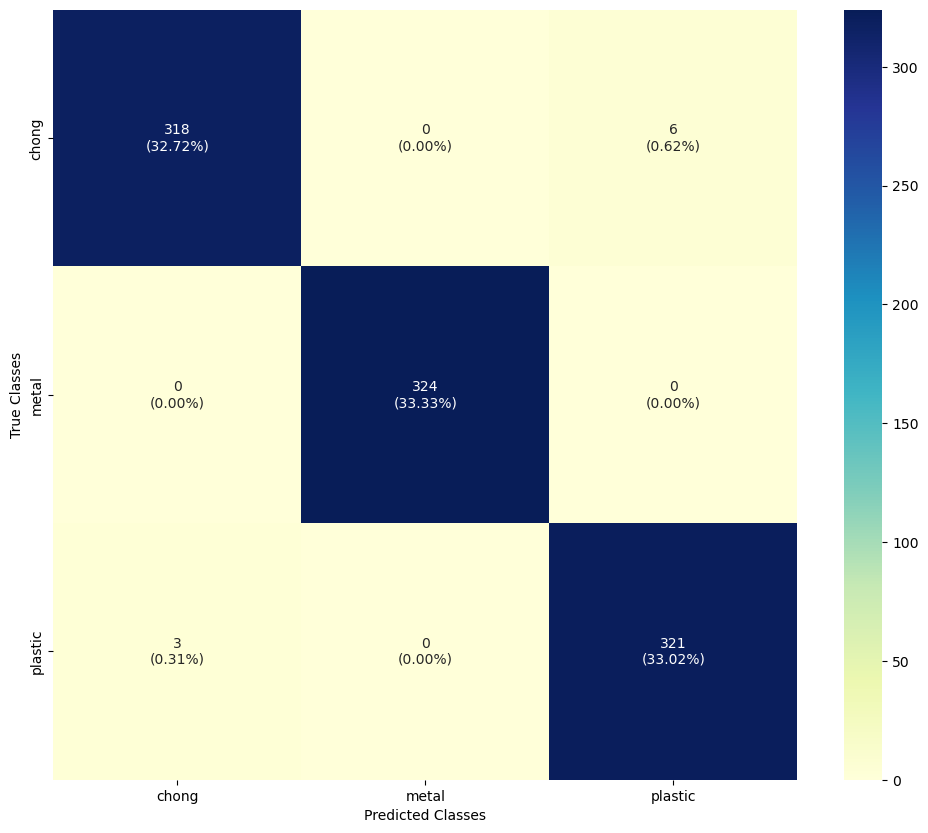

In [20]:
cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(num_of_classes, num_of_classes)

plt.figure(figsize = (12, 10))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [21]:
errors = (y_true - y_pred != 0)
idx_error = list(err_idx for err_idx in range(len(errors)) if errors[err_idx] == True)
print(idx_error)

y_true_errors = y_true[errors]
y_pred_errors = y_pred[errors]

[139, 198, 219, 220, 263, 264, 738, 749, 902]


In [22]:
for idx_num in range(len(idx_error)):
    idx = idx_error[idx_num]
    
    true_index = y_true[idx]
    true_label = labels[true_index]
    
    predicted_index = y_pred[idx]
    predicted_label = labels[predicted_index]
    
    fig = plt.figure()
    img_path = os.path.join(test_dataset, test_img[idx])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.title(f"The Wrong Prediction Image \n True Label: {true_label} \n Predicted Label: {predicted_label}")
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()
plt.show()

NameError: name 'test_img' is not defined

<Figure size 640x480 with 0 Axes>